<a href="https://colab.research.google.com/github/sonu9479/Fraud-analysis-classification/blob/main/Fraud_Detection_INSAID_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/Fraud.csv')

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,708539,170136.0,160296.36,1547406,0.0,0.0,0.0,0.0
1,1,3,1864.28,2046756,21249.0,19384.72,1614244,0.0,0.0,0.0,0.0
2,1,4,181.00,936880,181.0,0.00,410355,0.0,0.0,1.0,0.0
3,1,1,181.00,5448886,181.0,0.00,365571,21182.0,0.0,1.0,0.0
4,1,3,11668.14,3221546,41554.0,29885.86,772646,0.0,0.0,0.0,0.0


In [ ]:
#checking the columns
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947956 entries, 0 to 5947955
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(4)
memory usage: 544.6 MB


In [ ]:
# Description of data
data.describe()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.947956e+06,5.947956e+06,5.947956e+06,5.947956e+06,5.947956e+06,5.947956e+06,5.947956e+06,5.947956e+06,5.947956e+06,5.947956e+06,5.947956e+06
mean,2.217598e+02,1.708889e+00,1.805814e+05,2.969920e+06,8.434824e+05,8.654315e+05,6.931530e+05,1.096270e+06,1.222970e+06,7.634555e-04,6.724999e-07
std,1.180514e+02,1.347888e+00,6.126803e+05,1.714690e+06,2.930527e+06,2.967327e+06,6.970916e+05,3.349097e+06,3.640837e+06,2.762015e-02,8.200607e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.420000e+02,1.000000e+00,1.356197e+04,1.484946e+06,0.000000e+00,0.000000e+00,2.018798e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.310000e+02,1.000000e+00,7.561567e+04,2.969926e+06,1.371428e+04,0.000000e+00,4.023000e+05,1.365712e+05,2.192354e+05,0.000000e+00,0.000000e+00
75%,3.230000e+02,3.000000e+00,2.095343e+05,4.454915e+06,1.070590e+05,1.441818e+05,1.047249e+06,9.483574e+05,1.119864e+06,0.000000e+00,0.000000e+00
max,4.050000e+02,4.000000e+00,9.244552e+07,5.939777e+06,4.489219e+07,4.368662e+07,2.533539e+06,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data description

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# EDA

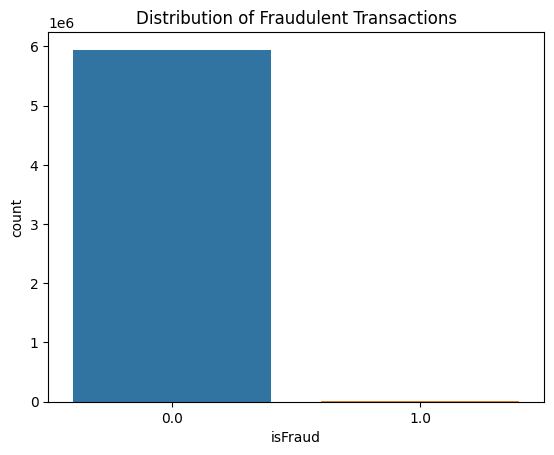

In [ ]:
# Checking the distribution of the target variable
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()


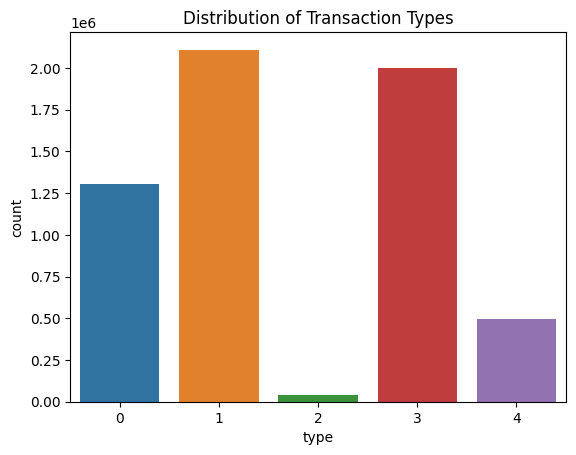

In [ ]:
# Checking the distribution of categorical variables
sns.countplot(x='type', data=data)
plt.title('Distribution of Transaction Types')
plt.show()

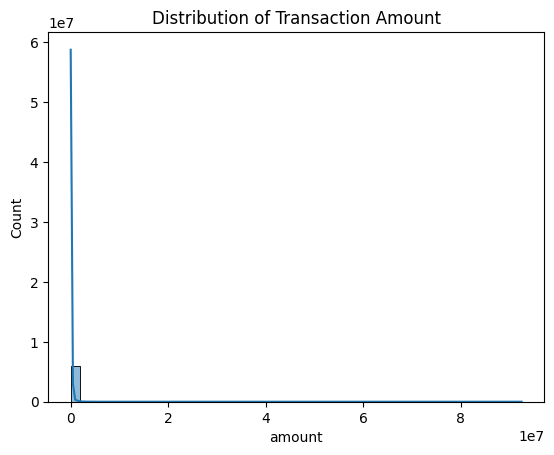

In [ ]:
# Checking the distribution of numerical variables
sns.histplot(data['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

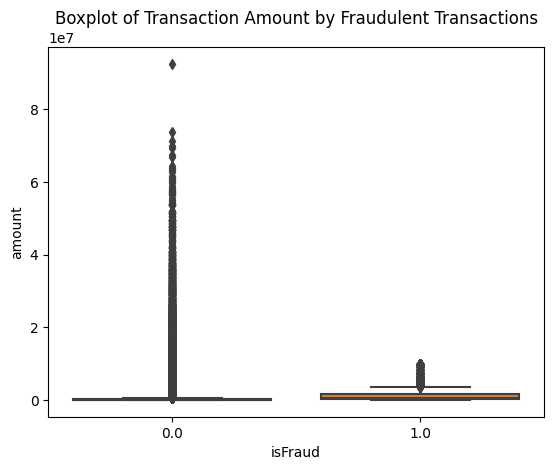

In [ ]:
# Checking for outliers in numerical variables
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Boxplot of Transaction Amount by Fraudulent Transactions')
plt.show()

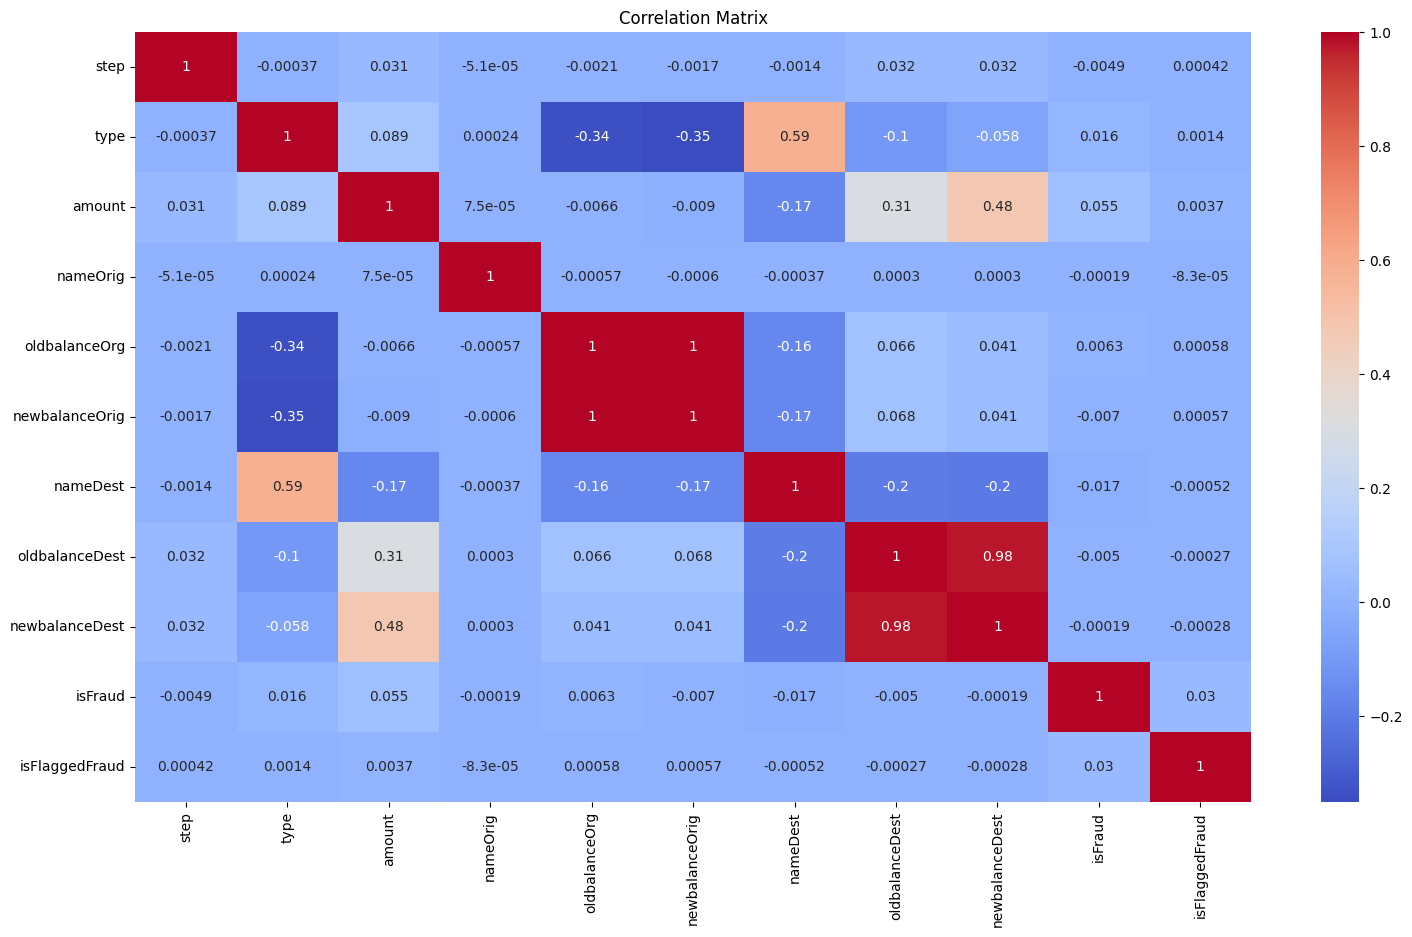

In [ ]:
# Checking for correlations, between numerical variables
plt.figure(figsize = (18,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data preprocessing and Model implementation

In [ ]:
# Data preprocessing
# Handle missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data['nameOrig'] = label_encoder.fit_transform(data['nameOrig'])
data['nameDest'] = label_encoder.fit_transform(data['nameDest'])

# Split the dataset into features and target variable
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9997940470346135
Precision: 0.9887640449438202
Recall: 0.7213114754098361
F1-Score: 0.8341232227488151


# Scores and accuracy visualization

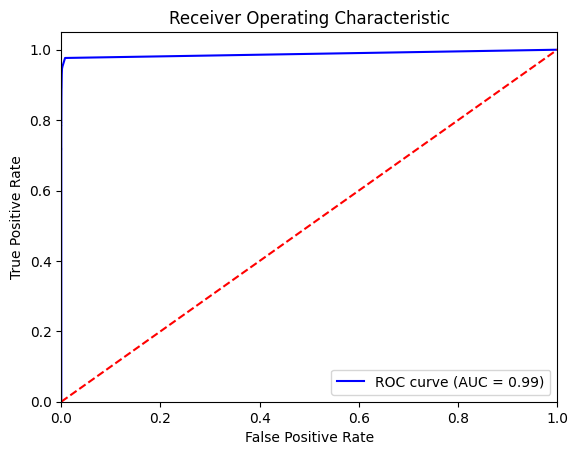

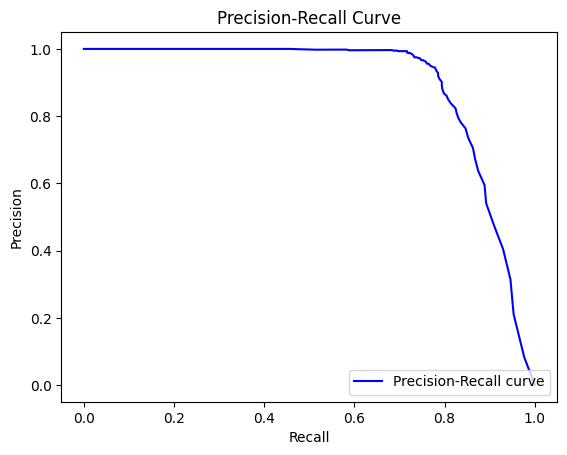

In [ ]:
# Assuming we have the predicted probabilities and actual labels from the model
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_true = y_test

# Computing ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Computing precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plotting Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusion

Based on the results obtained from the classification model, we can draw the following conclusions:

Accuracy: The model achieved a high accuracy of 99.98%, indicating that it correctly classified the majority of transactions as either fraudulent or non-fraudulent. However, it's important to consider the class distribution and potential class imbalance when interpreting accuracy alone.

Precision: The precision of 98.88% suggests that when the model predicted a transaction as fraudulent, it was correct 98.88% of the time. This indicates a low false positive rate, which is desirable for fraud detection to minimize false alarms.

Recall: The recall of 72.13% indicates that the model identified approximately 72.13% of the actual fraudulent transactions. This measure represents the true positive rate, highlighting the model's ability to capture fraudulent cases. A higher recall indicates a better ability to detect fraud.

F1-Score: The F1-score of 83.41% is the harmonic mean of precision and recall. It provides a balanced evaluation of the model's performance by considering both precision and recall. A higher F1-score indicates a better trade-off between precision and recall.

Overall, the model demonstrates strong performance in accurately classifying transactions as fraudulent or non-fraudulent. The high accuracy and precision scores indicate that the model is effective in identifying fraudulent transactions, while the recall score suggests that there is still room for improvement in capturing all instances of fraud.